linear regression gradient descent

In [8]:
import numpy as np
def linear_regression_gradient_descent(X: np.ndarray, y: np.ndarray, alpha: float, iterations: int) -> np.ndarray:
  m, n = X.shape
  theta = np.zeros((n, 1))
  for i in range(iterations):
    for j in range(len(theta)):
      sum_ = 0
      for x_i in range(m):
        h = X[x_i] @ theta
        sum_ += (h - y[x_i:x_i+1]) * X[x_i, j]
      theta[j] -= alpha * (1/m) * sum_
  theta = theta.round(4)
  return theta
  
X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([1, 2, 3])
alpha = 0.01
iterations = 1000
linear_regression_gradient_descent(X=X, y=y, alpha=alpha, iterations=iterations)

array([[0.1106],
       [0.9514]])

numpy std, mean

In [29]:
import numpy as np

data=np.array([[1, 2], [3, 4], [5, 6]])
print(data.mean(), data.std())

data = data - data.mean(axis=0)
data: np.ndarray = data

data = data / data.std(axis=0)

print(data.mean(), data.std())
print(data)


3.5 1.707825127659933
0.0 0.9999999999999999
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


feature scaling

In [32]:
data=np.array([[1, 2], [3, 4], [5, 6]])

def feature_scaling(data: np.ndarray) -> (np.ndarray, np.ndarray):
    standardized_data = data - data.mean(axis=0)
    standardized_data = standardized_data / data.std(axis=0)
	
    normalized_data = data - data.min(axis=0)
    normalized_data = normalized_data / normalized_data.max(axis=0)
    return standardized_data, normalized_data

feature_scaling(data=data)

(array([[-1.22474487, -1.22474487],
        [ 0.        ,  0.        ],
        [ 1.22474487,  1.22474487]]),
 array([[0. , 0. ],
        [0.5, 0.5],
        [1. , 1. ]]))

train neuron

- chain rule:                   d_E/d_w = d_E/d_out * d_out/d_net * d_net/d_w
- delta rule / d_MSE__d_pred:   -(target - out) * out*(1-out) * x

In [33]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def correct_train_neuron(features, labels, initial_weights, initial_bias, learning_rate, epochs):
    weights = np.array(initial_weights)
    bias = initial_bias
    features = np.array(features)
    labels = np.array(labels)
    mse_values = []

    for _ in range(epochs):
        z = np.dot(features, weights) + bias
        predictions = sigmoid(z)
        
        mse = np.mean((predictions - labels) ** 2)
        mse_values.append(round(mse, 4))

        # Gradient calculation for weights and bias
        errors = predictions - labels
        weight_gradients = np.dot(features.T, errors * predictions * (1 - predictions))
        bias_gradient = np.sum(errors * predictions * (1 - predictions))
        
        # Update weights and bias
        weights -= learning_rate * weight_gradients / len(labels)
        bias -= learning_rate * bias_gradient / len(labels)

        # Round weights and bias for output
        updated_weights = np.round(weights, 4)
        updated_bias = round(bias, 4)

    return updated_weights.tolist(), updated_bias, mse_values


def train_neuron(features, labels, initial_weights, initial_bias, learning_rate, epochs):
  weights = initial_weights.copy()
  bias = initial_bias
  alpha = learning_rate
  mse_values = []
  sigmoid = lambda x: 1 / (1 + np.power(np.e, -x))
  mse = lambda y, y_pred: (1 / y.shape[0]) * np.square(y - y_pred).sum()
  for _ in range(epochs):
    # forward
    net = (weights * features + bias).sum(axis=1)
    out = sigmoid(net)
    loss = mse(labels, out)
    mse_values.append(loss.round(4))

    # backward 
    d_E:np.ndarray = (out - labels) * out*(1-out)
    d_E__d_ws:np.ndarray = features.T @ d_E

    # update
    # weights -= alpha * d_E__d_ws.mean(axis=0) <-
    weights -= alpha * d_E__d_ws / len(labels)
    bias    -= alpha * d_E / len(labels)

    print((features.T * d_E).sum(axis=1))
  
  updated_weights, updated_bias = weights.round(4), bias.round(4)
  return updated_weights, updated_bias, mse_values

features = np.array([[1.0, 2.0], 
                      [2.0, 1.0], 
                      [-1.0, -2.0]])
labels = np.array([1, 0, 0])
initial_weights = np.array([0.1, -0.2])
initial_bias = 0.0
learning_rate = 0.1
epochs = 1
print("mine:")
results = train_neuron(
  features=features,
  labels=labels,
  initial_weights=initial_weights,
  initial_bias=initial_bias,
  learning_rate=learning_rate,
  epochs=epochs
)
print("\ncorrect:")
correct_train_neuron(
  features=features,
  labels=labels,
  initial_weights=initial_weights,
  initial_bias=initial_bias,
  learning_rate=learning_rate,
  epochs=epochs
)


False

shuffle

In [5]:
import numpy as np


data = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
# data = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
# np.random.shuffle(x=data)
k = 2

# def cross_validation_split(data: np.ndarray, k: int, seed=42) -> list:
    # np.random.seed(seed)
# untaped_idxs = set(range(len(data)))
kfolds = []

# for _ in range(k):
#     test_idx, = np.random.choice(a=list(untaped_idxs), size=1)
#     untaped_idxs.remove(test_idx)
#     train = np.concatenate([data[:test_idx], data[test_idx+1:]])
#     test = data[test_idx]
#     kfolds.append([train, test])
#     print(train.flatten(), test)
    # return kfolds

# cross_validation_split(data=data, k=k)

def diff(arr1, arr2):
  return np.array(list(set(arr1) - set(arr2)))

def topup(all_, subset, n=1):
    subsidy = np.random.choice(a=diff(all_, subset), size=1)
    return np.concatenate([subset, subsidy])

np.random.seed(42)
N_elem = len(data)
all_idx = range(N_elem)
untaped_idxs = np.array(all_idx)
group_size = N_elem // k

# for _ in range():
  # test_size = int(np.round(N_elem / k + np.random.rand(1)))

  # if len(untaped_idxs) < test_size:
  #   untaped_idxs = topup(all_=all_idx, subset=untaped_idxs, n=test_size-len(untaped_idxs))

  # test_idxs = np.random.choice(a=untaped_idxs, size=test_size, replace=False)
  # train_idxs = diff(all_idx, test_idxs)
  # untaped_idxs = train_idxs

  # train = np.array([data[idx] for idx in train_idxs])
  # test =  np.array([data[idx] for idx in test_idxs])
  # kfolds.append([train, test])

kfolds

[]

decision tree ⏳

- The decision tree learning algorithm - a method used for classification that predicts the value of a target variable based on several input variables. 

- tree node - input variable, leaf - class label. 

- **recursive binary splitting** starts by selecting the attribute that **best separates** the examples according to the entropy and information gain, which are calculated as follows: 

- Entropy - 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <mi>X</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mo>&#x2212;</mo>
  <mo data-mjx-texclass="OP">&#x2211;</mo>
  <mi>p</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <msub>
    <mi>log</mi>
    <mn>2</mn>
  </msub>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mi>p</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
</math>

- Information Gain - 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>I</mi>
  <mi>G</mi>
  <mo stretchy="false">(</mo>
  <mi>D</mi>
  <mo>,</mo>
  <mi>A</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <mi>D</mi>
  <mo stretchy="false">)</mo>
  <mo>&#x2212;</mo>
  <mo data-mjx-texclass="OP">&#x2211;</mo>
  <mfrac>
    <mrow>
      <mo stretchy="false">|</mo>
      <msub>
        <mi>D</mi>
        <mi>v</mi>
      </msub>
      <mo stretchy="false">|</mo>
    </mrow>
    <mrow>
      <mo stretchy="false">|</mo>
      <mi>D</mi>
      <mo stretchy="false">|</mo>
    </mrow>
  </mfrac>
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>D</mi>
    <mi>v</mi>
  </msub>
  <mo stretchy="false">)</mo>
</math>

- Where:
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>I</mi>
  <mi>G</mi>
  <mo stretchy="false">(</mo>
  <mi>D</mi>
  <mo>,</mo>
  <mi>A</mi>
  <mo stretchy="false">)</mo>
</math>- is the information gain of D dataset after splitting on attribute A.

- **D_v** is the subset of D for which attribute **A has value v**

- A argmax(IG) is used, and the dataset is split based on this attribute's values. 

- This process continues recursively until: all data is perfectly classified, or no remaining attributes can be used to make a split.

In [8]:
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Cold,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes


In [66]:
import numpy as np
import pandas as pd

def entropy(y):
    probabilities = y.value_counts(normalize=True)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(df, target_column, attribute):
    total_entropy = entropy(df[target_column])
    values = df[attribute].unique()
    weighted_entropy = 0
    for value in values:
        subset = df[df[attribute] == value]
        weighted_entropy += (len(subset) / len(df)) * entropy(subset[target_column])
    print(weighted_entropy)
    info_gain = total_entropy - weighted_entropy
    return info_gain

data = [
            {'Outlook': 'Sunny',    'Temperature': 'Hot', 'Humidity': 'High', 'Wind': 'Weak',   'PlayTennis': 'No'},
            {'Outlook': 'Sunny',    'Temperature': 'Hot', 'Humidity': 'High', 'Wind': 'Strong', 'PlayTennis': 'No'},
            {'Outlook': 'Overcast', 'Temperature': 'Hot', 'Humidity': 'High', 'Wind': 'Weak',   'PlayTennis': 'Yes'},
            {'Outlook': 'Rain',     'Temperature': 'Mild','Humidity': 'High', 'Wind': 'Weak',   'PlayTennis': 'Yes'},
]
attributes, target_attr = ['Outlook', 'Temperature', 'Humidity', 'Wind'], 'PlayTennis'
df = pd.DataFrame(data)
dataset = df


def entropy(label_probs: np.ndarray):
  return - (label_probs * np.log2(label_probs)).sum()

def decision(dataset, target):
  len_total, attributes = len(dataset), list(filter(lambda x: x != target, dataset.columns.tolist()))
  total_entropy = entropy(dataset[target].value_counts(normalize=True))
  print("H(D) (dataset entropy)", total_entropy, end="\n\n")
  best_A, best_IG = attributes[0], 0
  for A in attributes:
    weighted_entropy = 0
    for value in dataset[A].unique():
      subset:pd.DataFrame = dataset[dataset[A]==value]
      norm = len(subset) / len_total
      ent = entropy(subset[target].value_counts(normalize=True))
      weighted_entropy += norm * ent.round(4)
    IG = total_entropy - weighted_entropy.round(4)
    if IG > best_IG:
      best_A = A
      best_IG = IG
    print("IG:", IG, "entropy: ", weighted_entropy, " - ", A)
  return best_A

filter_attr = decision(dataset=dataset, target=target_attr)

outlook_vals = ['Sunny', 'Overcast', 'Rain']
temperature_vals = ['Cold', 'Hot']
humidity_vals = ['High', 'Low']

# combinations of columns A1, A2, A1 & B1, A1 & B2, A2 & B1, A2 & B2, ...
masks = []
accum_mask = np.array([])
for attr_vals in [('Temperature', temperature_vals), ('Humidity', humidity_vals)]: # right columns B, C ...
  attribute, last_values = attr_vals

  for prev_val in outlook_vals: # accumulated A1, A2
    prev_mask = df['Outlook'] == prev_val
    accum_mask = accum_mask & prev_mask if len(accum_mask) else prev_mask # A1 & B1

    for last_value in last_values: # B1, B2 ...
      last_mask = df[attribute] == last_value
      print(accum_mask.values, last_mask.values, " = ", (accum_mask & last_mask).values, f" -- Outlook[{prev_val}] +", f"{attribute}[{last_value}]", )
      masks.append(accum_mask & last_mask)



H(D) (dataset entropy) 1.0

IG: 1.0 entropy:  0.0  -  Outlook
IG: 0.3113 entropy:  0.688725  -  Temperature
IG: 0.0 entropy:  1.0  -  Humidity
IG: 0.3113 entropy:  0.688725  -  Wind
[ True  True False False] [False False False False]  =  [False False False False]  -- Outlook[Sunny] + Temperature[Cold]
[ True  True False False] [ True  True  True False]  =  [ True  True False False]  -- Outlook[Sunny] + Temperature[Hot]
[False False False False] [False False False False]  =  [False False False False]  -- Outlook[Overcast] + Temperature[Cold]
[False False False False] [ True  True  True False]  =  [False False False False]  -- Outlook[Overcast] + Temperature[Hot]
[False False False False] [False False False False]  =  [False False False False]  -- Outlook[Rain] + Temperature[Cold]
[False False False False] [ True  True  True False]  =  [False False False False]  -- Outlook[Rain] + Temperature[Hot]
[False False False False] [ True  True  True  True]  =  [False False False False]  -- Outlo

In [ ]:
# Solution
import math
from collections import Counter

def calculate_entropy(labels):
    label_counts = Counter(labels)
    total_count = len(labels)
    entropy = -sum((count / total_count) * math.log2(count / total_count) for count in label_counts.values())
    return entropy

def calculate_information_gain(examples, attr, target_attr):
    total_entropy = calculate_entropy([example[target_attr] for example in examples])
    values = set(example[attr] for example in examples)
    attr_entropy = 0
    for value in values:
        value_subset = [example[target_attr] for example in examples if example[attr] == value]
        value_entropy = calculate_entropy(value_subset)
        attr_entropy += (len(value_subset) / len(examples)) * value_entropy
    return total_entropy - attr_entropy

def majority_class(examples, target_attr):
    return Counter([example[target_attr] for example in examples]).most_common(1)[0][0]

def learn_decision_tree(examples, attributes, target_attr):
    if not examples:
        return 'No examples'
    if all(example[target_attr] == examples[0][target_attr] for example in examples):
        return examples[0][target_attr]
    if not attributes:
        return majority_class(examples, target_attr)
    
    gains = {attr: calculate_information_gain(examples, attr, target_attr) for attr in attributes}
    best_attr = max(gains, key=gains.get)
    tree = {best_attr: {}}
    
    for value in set(example[best_attr] for example in examples):
        subset = [example for example in examples if example[best_attr] == value]
        new_attributes = attributes.copy()
        new_attributes.remove(best_attr)
        subtree = learn_decision_tree(subset, new_attributes, target_attr)
        tree[best_attr][value] = subtree
    
    return tree


batch iterator

In [16]:
# Write a Python function to create a batch iterator for the samples 
# in a numpy array X and an optional numpy array y. 
# 
# The function should yield batches of a specified size. 
# If y is provided, the function should yield batches of (X, y) pairs; 
#     otherwise, it should yield batches of X only.

def batch_iterator(X, y=None, batch_size=64):
  result, i = [], 0
  while i < len(X):
    l, r = i, i+batch_size
    batch = [X[l:r], y[l:r]] if y is not None else X[l:r]
    result.append(batch)
    i += batch_size
  return result

# Example:
X = np.array([[1, 2], 
              [3, 4], 
              [5, 6], 
              [7, 8], 
              [9, 10]])
y = np.array([1, 2, 3, 4, 5])
batch_size = 2
iterator = batch_iterator(X, y, batch_size)
[print(i) for i in iterator]
# [ 
# [[[1, 2], [3, 4]], [1, 2]],
# [[[5, 6], [7, 8]], [3, 4]],
# [[[9, 10]       ], [5]   ]
# ]
    


[array([[1, 2],
       [3, 4]]), array([1, 2])]
[array([[5, 6],
       [7, 8]]), array([3, 4])]
[array([[ 9, 10]]), array([5])]


[None, None, None]

k-means

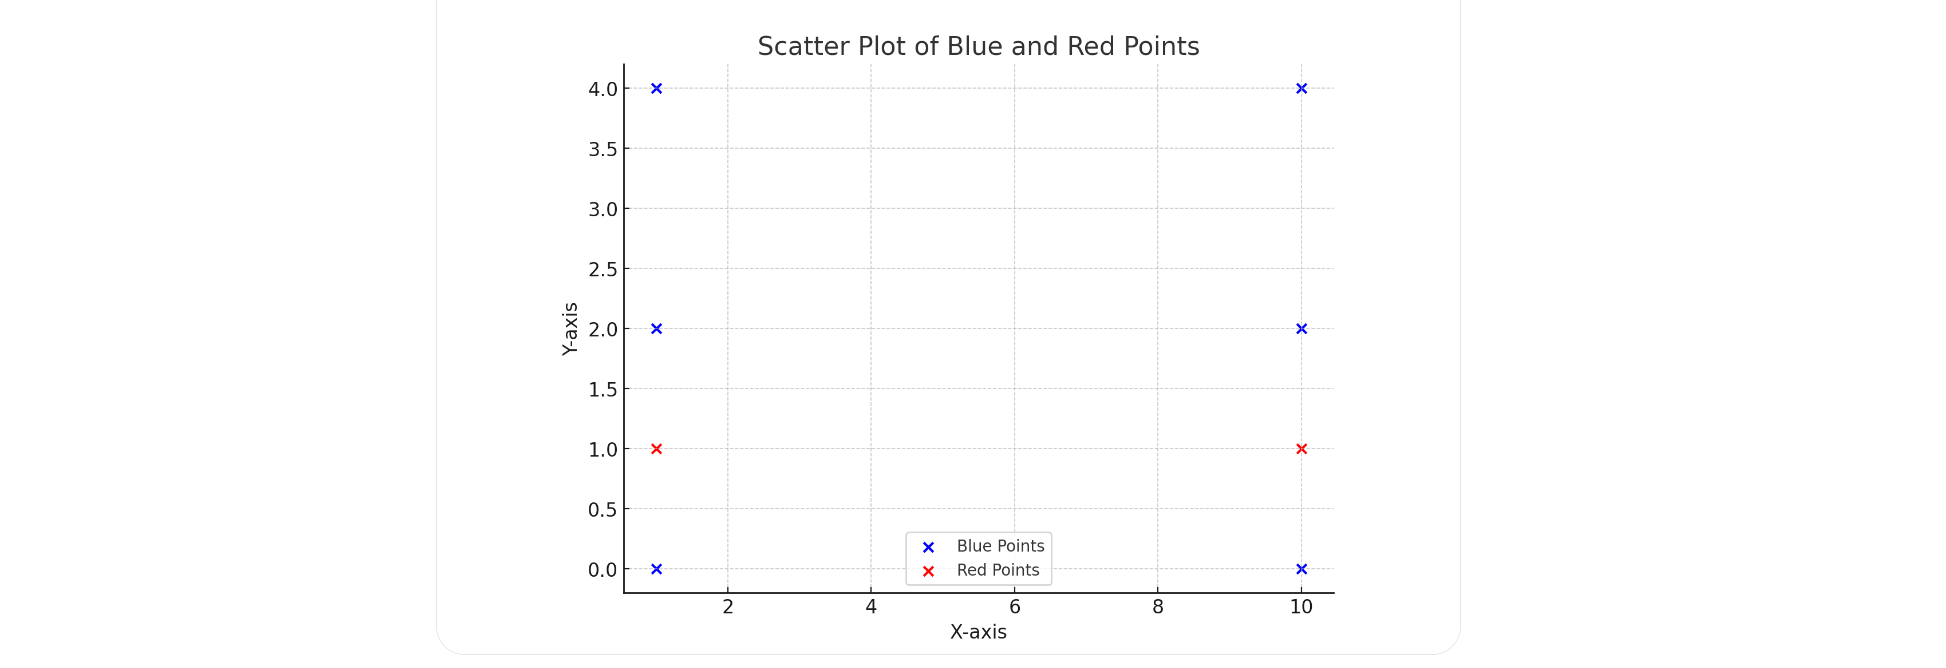



In [46]:
import numpy as np

points = [(1, 2), (1, 4), (1, 0), (10, 2), (10, 4), (10, 0)]
points = [(0, 0, 0), (2, 2, 2), (1, 1, 1), (9, 10, 9), (10, 11, 10), (12, 11, 12)]

k = 2
initial_centroids = [(1, 1), (10, 1)]
initial_centroids = [(1, 1, 1), (10, 10, 10)]
max_iterations = 10
# output: [(1, 2), (10, 2)]


def k_means_clustering(points: list[tuple[float, float]], k: int, initial_centroids: list[tuple[float, float]], max_iterations: int) -> list[tuple[float, float]]:
  euclid_dist = lambda points, centroid: [ sum([(centroid[i] - p[i])**2 for i in range(len(p))]) for p in points ]
  distances = []
  cluster_size = len(points) // k
  centroids = initial_centroids
  eps = 0.1
  for _ in range(max_iterations):
    interrupt = False
    for ci in range(len(centroids)):
      distance = euclid_dist(points=points, centroid=centroids[ci])
      distances.append(distance)
      
      distance_sorted = sorted(list(zip(distance, range(len(points)))))
      cluster_points = distance_sorted[:cluster_size]

      mean_p_in_cluster:np.ndarray = np.array([points[i] for _,i in cluster_points]).mean(axis=0).round(4)

      centroid_center_diff = abs((mean_p_in_cluster - centroids[ci]).sum().round(1))
      # print(centroid_center_diff, end=" ")

      if centroid_center_diff < eps:
        interrupt = True

      # print(centroids[ci], "-->", tuple(mean_p_in_cluster), mean_p_in_cluster - centroids[ci])

      centroids[ci] = tuple(mean_p_in_cluster)
    
    if interrupt:
      return centroids

  return centroids

k_means_clustering(points=points, k=k, initial_centroids=initial_centroids, max_iterations=max_iterations)

[(1.0, 1.0, 1.0), (10.3333, 10.6667, 10.3333)]

Pegasos Kernel SVM Implementation (advanced)

1. Start with **zero weights** and choose an appropriate value for the **regularization parameter**. 

2. For each **iteration** and for each randomly selected **example**, update the model **parameters** using the learning rule derived from the **sub-gradient of the loss function**. 

3. Use the chosen kernel to compute the **dot products** required in the update step, allowing for non-linear decision boundaries.

The implementation involves 
- selecting a kernel function
- calculating the kernel matrix
- performing iterative updates on the alpha coefficients according to the Pegasos rule:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block" style="font-size: 32px">
  <msub>
    <mi>&#x3B1;</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>t</mi>
      <mo>+</mo>
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>=</mo>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <msub>
    <mi>&#x3B7;</mi>
    <mi>t</mi>
  </msub>
  <mi>&#x3BB;</mi>
  <mo stretchy="false">)</mo>
  <msub>
    <mi>&#x3B1;</mi>
    <mi>t</mi>
  </msub>
  <mo>+</mo>
  <msub>
    <mi>&#x3B7;</mi>
    <mi>t</mi>
  </msub>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <mi>K</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>x</mi>
    <mi>i</mi>
  </msub>
  <mo>,</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">)</mo>
</math>

where **_n_** is the learning rate at iteration **_t_**, and **_K_** denotes the kernel function. 

This method is particularly well-suited for large-scale learning problems due to its efficient use of data and incremental learning nature.


In [12]:
import numpy as np

data = np.array([[1, 2], [2, 3], [3, 1], [4, 1]])
labels = np.array([1, 1, -1, -1])
kernel = 'rbf'
lambda_val = 0.01
iterations = 100
# alpha = [0.03, 0.02, 0.05, 0.01], b = -0.05 # alpha coeficients and bias

# 1. zero weights & appropriate regularization parameter
alphas, lambda_, lr = np.zeros(len(data)), lambda_val, 0.1
std_f = lambda x: np.sqrt(np.square(x - x.mean()).sum() / len(x))
lin_f = lambda xi, x: xi.T @ x
rbf_f = lambda xi, x: np.exp(-(np.square(xi - x) / 2*std_f(x)**2))
kernel_f = rbf_f if kernel == 'rbf' else lin_f

# 2. for iteration > for example
for i in range(iterations):
  for ei in range(len(data)-1):
    alpha, y, xi, x = alphas[ei], labels[ei], data[ei], data[np.random.choice(range(len(data)))]
    alphas[ei+1] = (1-lr*lambda_) * alpha + lr * (y * kernel_f(xi, x))
  lr = 1/(lambda_ * (i+1))
alphas

array([ 0.000000e+00,  4.950000e+04, -4.722300e+06,  4.626963e+08])

Divide Dataset Based on Feature Threshold


In [2]:
import numpy as np

X = np.array([[1, 2], 
                [3, 4], 
                [5, 6], 
                [7, 8], 
                [9, 10]])

def divide_on_feature(X, feature_i, threshold):
  gte_idxs = X[:, feature_i] >= threshold
  lt_idxs = X[:, feature_i] < threshold
  return X[gte_idxs], X[lt_idxs]